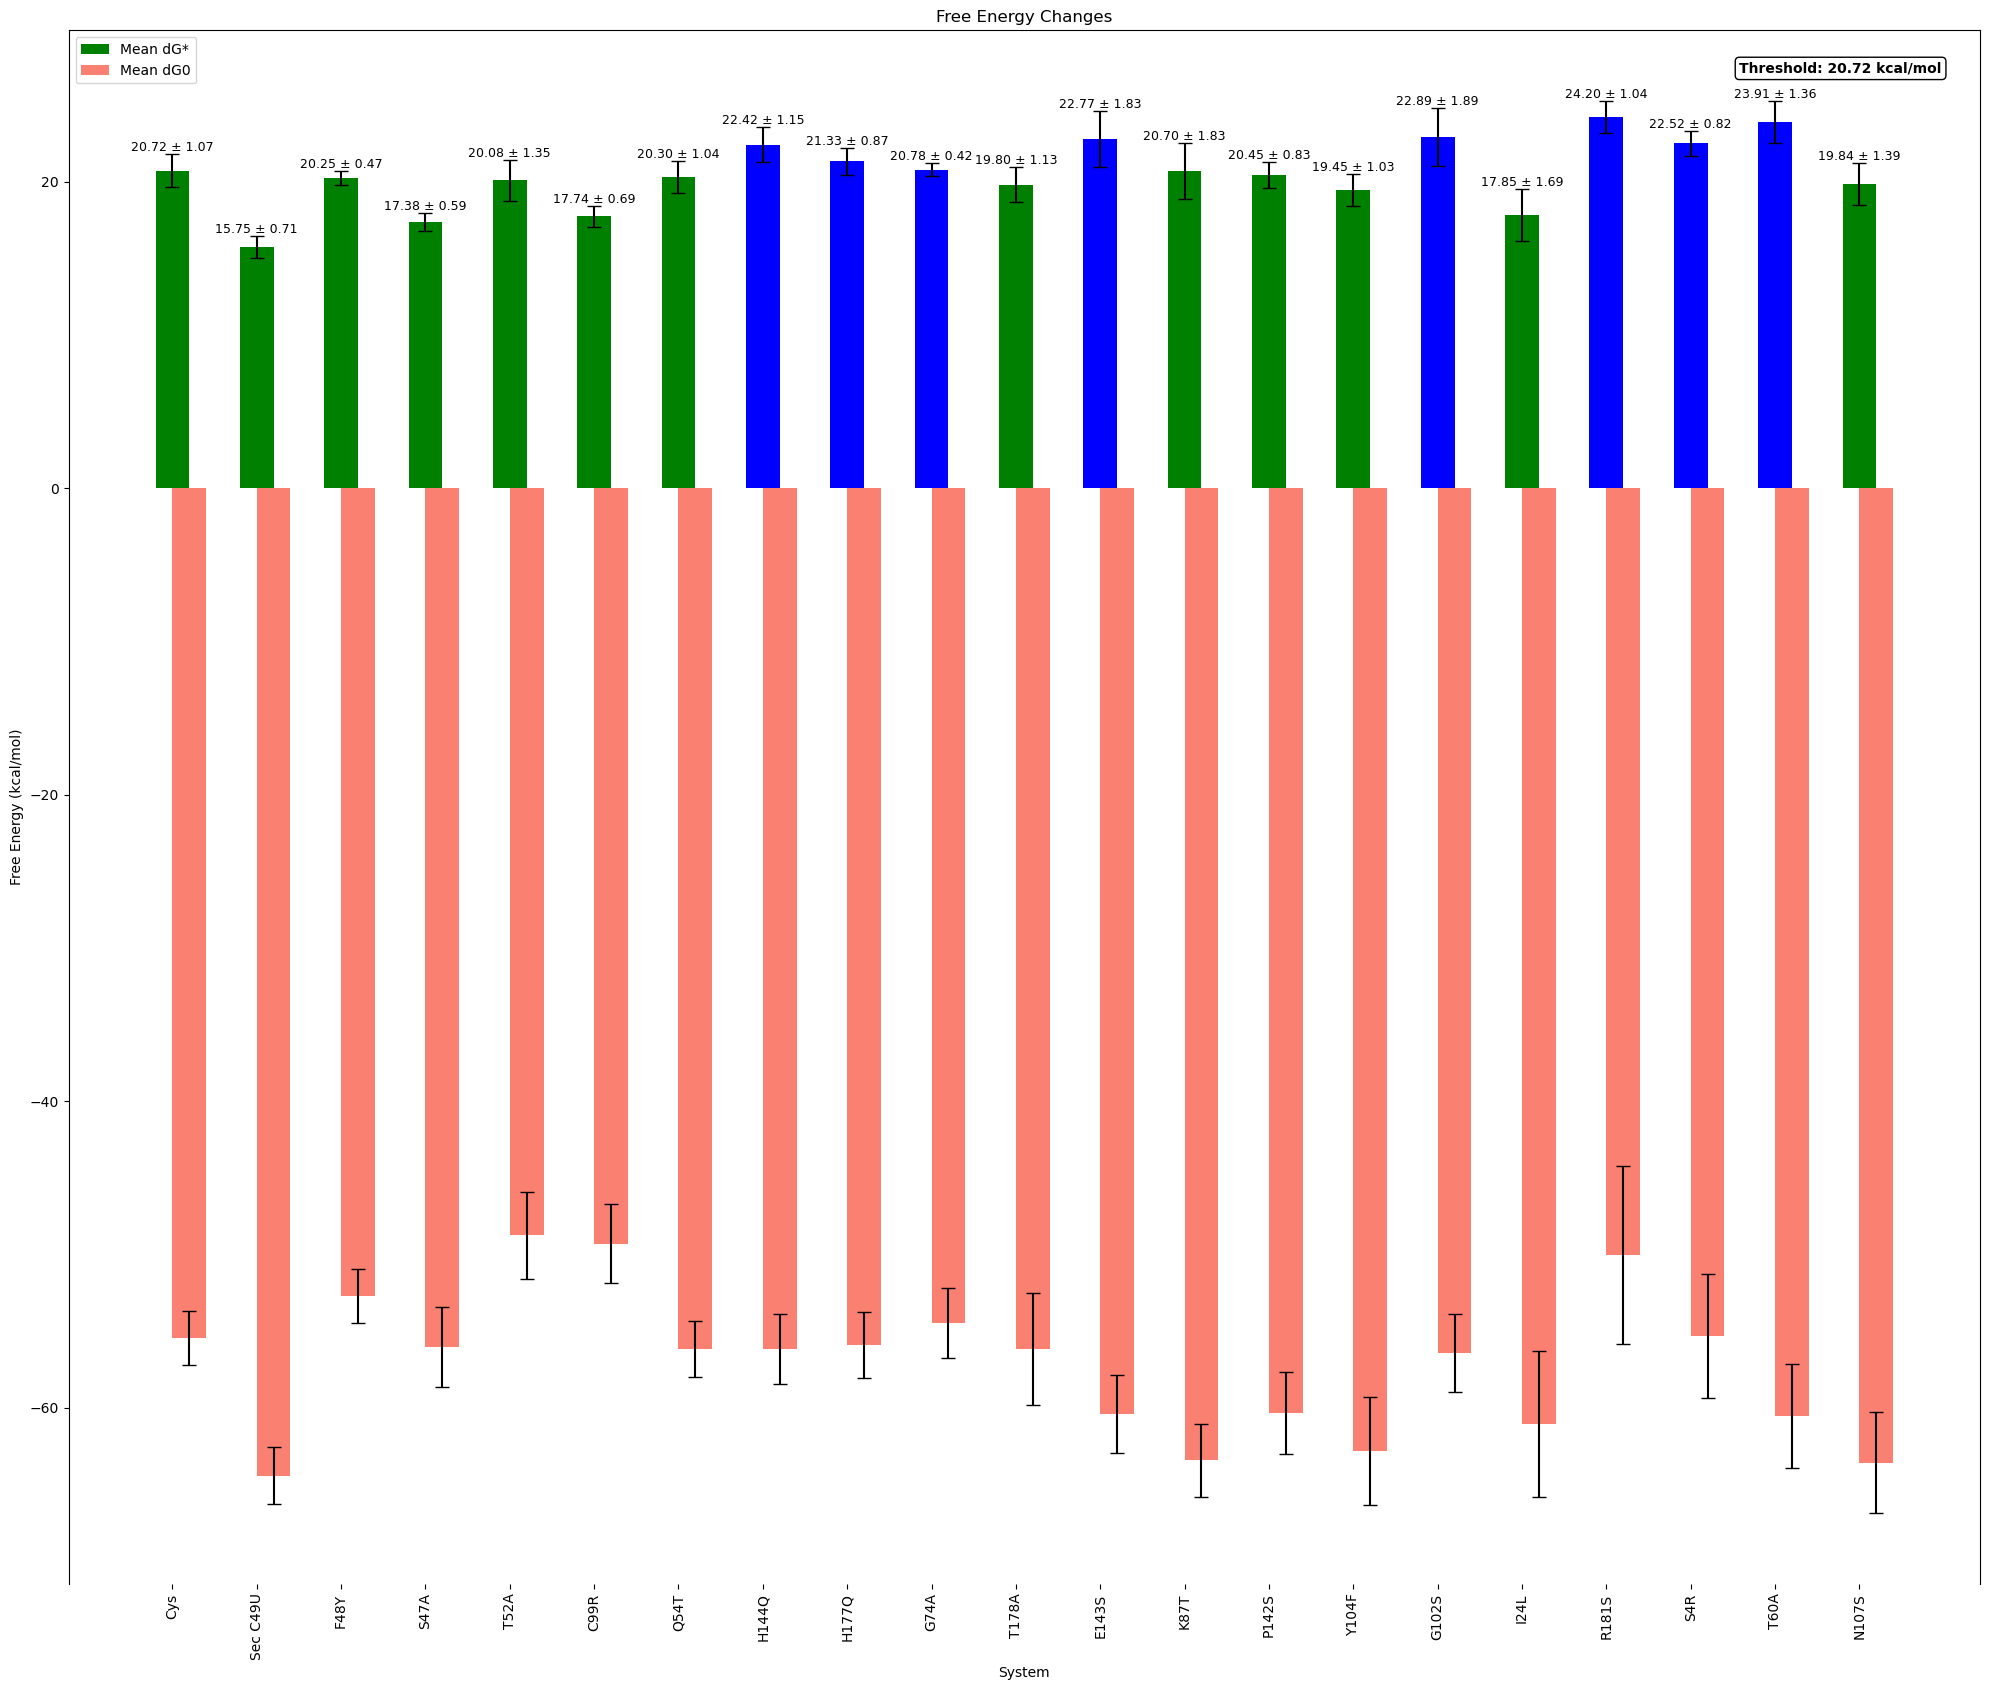

In [16]:
import re
import matplotlib.pyplot as plt

# Full LaTeX table string with \hline
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}
\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    Cys & 20.72 $\pm$ 1.07 kcal/mol & -55.43 $\pm$ 1.77 kcal/mol \\
    \hline
    Sec C49U & 15.75 $\pm$ 0.71 kcal/mol & -64.42 $\pm$ 1.86 kcal/mol \\
    \hline
    F48Y & 20.25 $\pm$ 0.47 kcal/mol & -52.71 $\pm$ 1.74 kcal/mol \\
    \hline
    S47A & 17.38 $\pm$ 0.59 kcal/mol & -56.04 $\pm$ 2.59 kcal/mol \\
    \hline
    T52A & 20.08 $\pm$ 1.35 kcal/mol & -48.75 $\pm$ 2.83 kcal/mol \\
    \hline
    C99R & 17.74 $\pm$ 0.69 kcal/mol & -49.28 $\pm$ 2.55 kcal/mol \\
    \hline
    Q54T & 20.30 $\pm$ 1.04 kcal/mol & -56.15 $\pm$ 1.82 kcal/mol \\
    \hline
    H144Q & 22.42 $\pm$ 1.15 kcal/mol & -56.18 $\pm$ 2.28 kcal/mol \\
    \hline
    H177Q & 21.33 $\pm$ 0.87 kcal/mol & -55.91 $\pm$ 2.14 kcal/mol \\
    \hline
    G74A & 20.78 $\pm$ 0.42 kcal/mol & -54.45 $\pm$ 2.28 kcal/mol \\
    \hline
    T178A & 19.80 $\pm$ 1.13 kcal/mol & -56.16 $\pm$ 3.66 kcal/mol \\
    \hline
    E143S & 22.77 $\pm$ 1.83 kcal/mol & -60.43 $\pm$ 2.55 kcal/mol \\
    \hline
    K87T & 20.70 $\pm$ 1.83 kcal/mol & -63.43 $\pm$ 2.39 kcal/mol \\
    \hline
    P142S & 20.45 $\pm$ 0.83 kcal/mol & -60.33 $\pm$ 2.67 kcal/mol \\
    \hline
    Y104F & 19.45 $\pm$ 1.03 kcal/mol & -62.83 $\pm$ 3.54 kcal/mol \\
    \hline
    G102S & 22.89 $\pm$ 1.89 kcal/mol & -56.43 $\pm$ 2.55 kcal/mol \\
    \hline
    I24L & 17.85 $\pm$ 1.69 kcal/mol & -61.05 $\pm$ 4.78 kcal/mol \\
    \hline
    R181S & 24.20 $\pm$ 1.04 kcal/mol & -50.04 $\pm$ 5.82 kcal/mol \\
    \hline
    S4R & 22.52 $\pm$ 0.82 kcal/mol & -55.30 $\pm$ 4.04 kcal/mol \\
    \hline
    T60A & 23.91 $\pm$ 1.36 kcal/mol & -60.53 $\pm$ 3.40 kcal/mol \\
    \hline
    N107S & 19.84 $\pm$ 1.39 kcal/mol & -63.57 $\pm$ 3.30 kcal/mol \\
    \hline
    \end{tabular}
    \caption{Free Energy Changes for Mouse Cys Mutants}
\end{table}
\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<system>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)\s*kcal/mol",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
systems = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

if matches:
    for match in matches:
        system, dg_star, dg_star_error, dg0, dg0_error = match
        systems.append(system.strip())
        dg_star_values.append(float(dg_star))
        dg_star_errors.append(float(dg_star_error))
        dg0_values.append(float(dg0))
        dg0_errors.append(float(dg0_error))

    # Find the threshold value (Cys dG*)
    cys_index = next((i for i, system in enumerate(systems) if "cys" in system.lower()), None)

    if cys_index is not None:
        threshold_dg_star = dg_star_values[cys_index]
    else:
        print("Cys system not found.")
        threshold_dg_star = None  # Handle the case when 'Cys' is not found

    # Proceed with plotting only if Cys is found
    if threshold_dg_star is not None:
        # Color condition for dG* bars based on Cys threshold
        colors = ['blue' if dg_star > threshold_dg_star else 'green' for dg_star in dg_star_values]

        # Plot the data as a bar plot with a wider figure
        fig, ax = plt.subplots(figsize=(20, 17))  # Increased width

        # Bar positions
        x = range(len(systems))

        # Plot Mean dG* values with error bars
        bars = ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

        # Plot Mean dG0 values with error bars
        ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='salmon', width=0.4, align='edge')

        # Add text annotations for dG* values and errors
        for i, bar in enumerate(bars):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + dg_star_errors[i],
                    f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
                    ha='center', va='bottom', fontsize=9, color='black')

        # Remove horizontal grid lines
        ax.grid(False)

        # Remove x-axis line (spine)
        ax.spines['bottom'].set_visible(False)

        # Add label for the threshold value in the upper-right corner
        ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
                color='black', fontsize=10, ha='right', va='top', fontweight='bold', 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Customizing plot
        ax.set_xticks(x)
        ax.set_xticklabels(systems, rotation=90, ha="center")
        ax.set_xlabel("System")
        ax.set_ylabel("Free Energy (kcal/mol)")
        ax.set_title("Free Energy Changes")
        ax.legend(loc='upper left')

        plt.tight_layout()
        plt.show()

else:
    print("No matches found.")


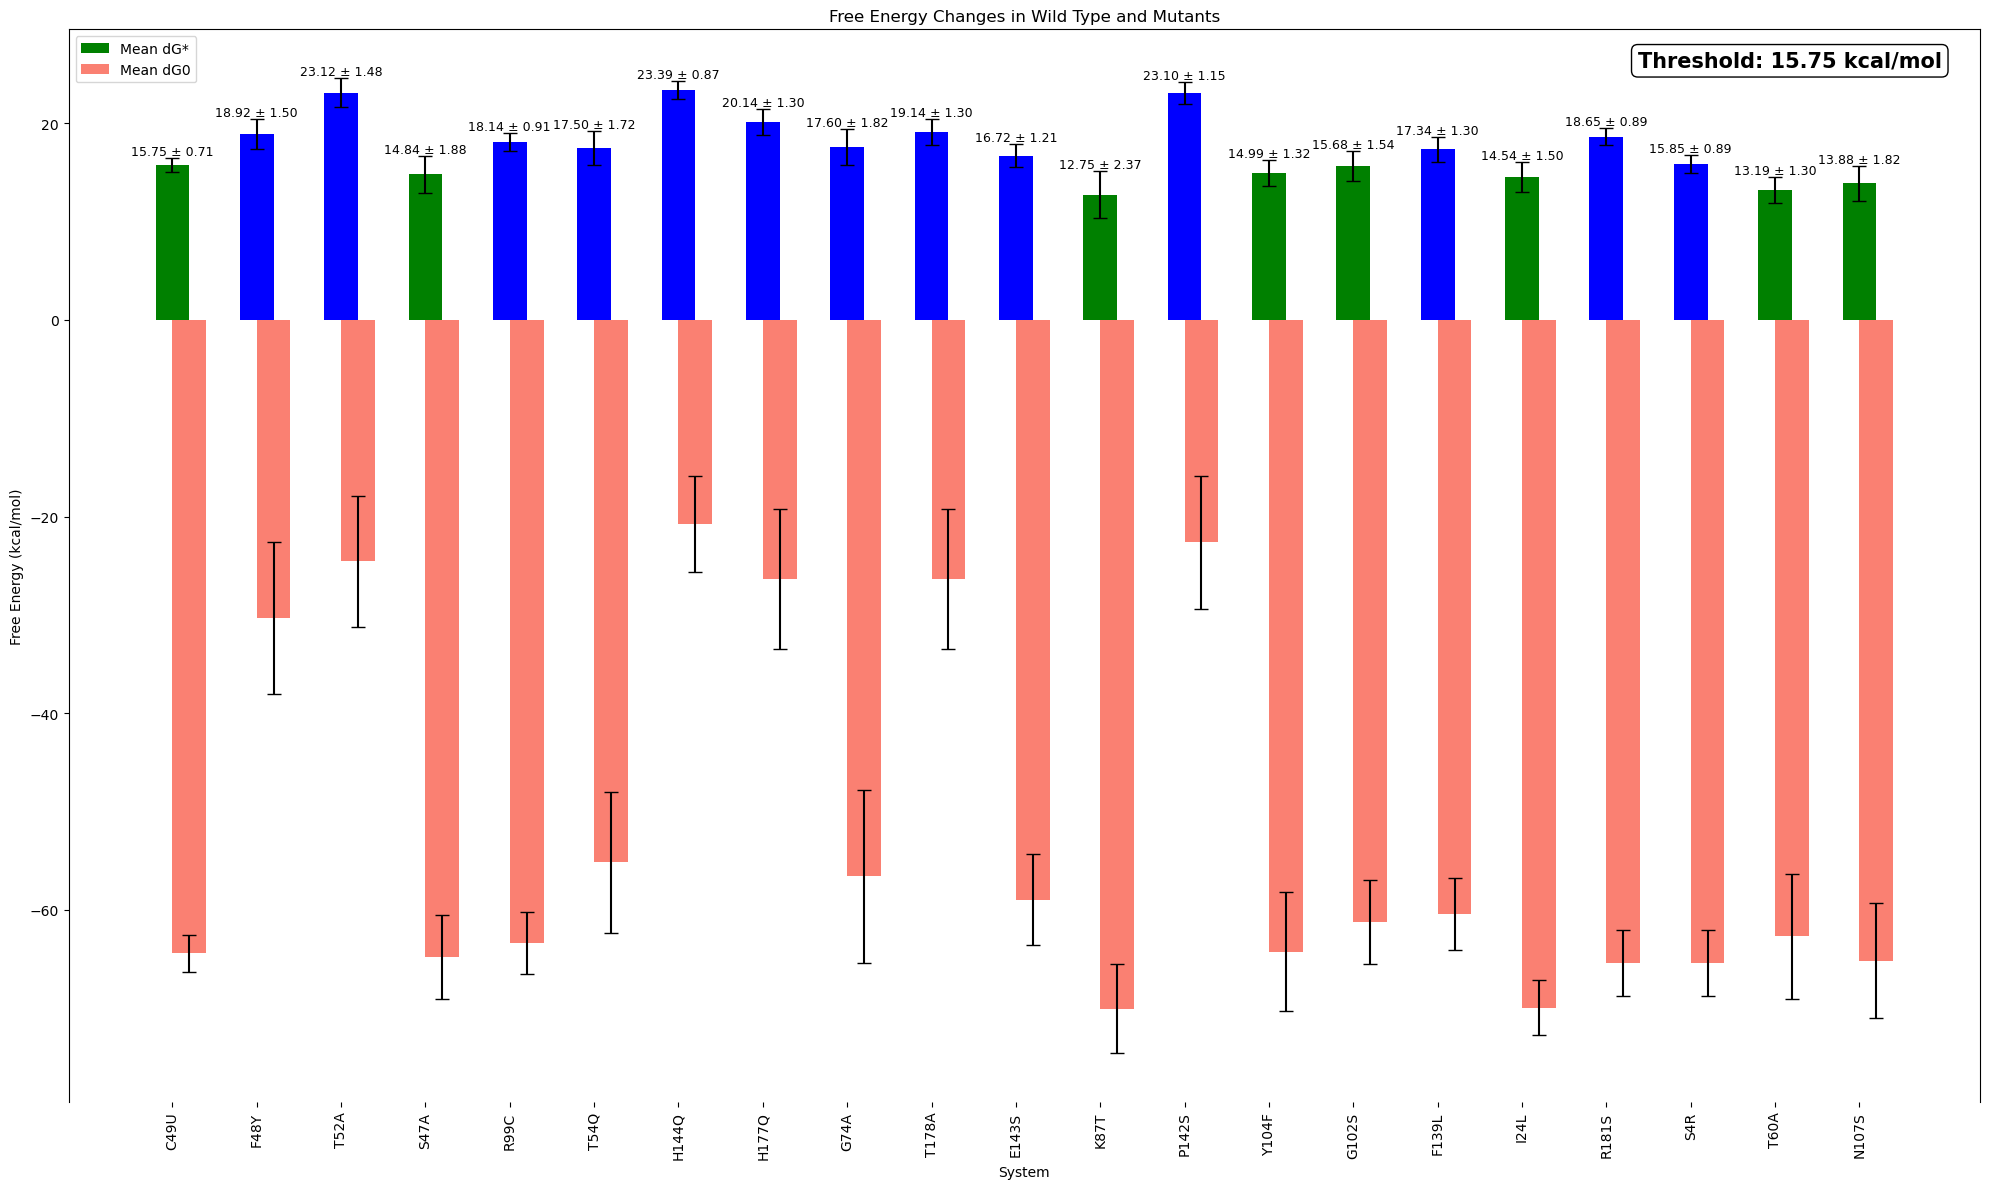

In [ ]:
import re
import matplotlib.pyplot as plt

# Updated LaTeX table with your new data
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}
\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    \textbf{Mutation} & \textbf{Wild Type Energy (kcal/mol)} & \textbf{Mutant Energy (kcal/mol)} \\
    \hline
    C49U & 15.75 $\pm$ 0.71 & -64.42 $\pm$ 1.86 \\
    \hline
    F48Y & 18.92 $\pm$ 1.50 & -30.33 $\pm$ 7.76 \\
    \hline
    T52A & 23.12 $\pm$ 1.48 & -24.54 $\pm$ 6.66 \\
    \hline
    S47A & 14.84 $\pm$ 1.88 & -64.79 $\pm$ 4.23 \\
    \hline
    R99C & 18.14 $\pm$ 0.91 & -63.37 $\pm$ 3.15 \\
    \hline
    T54Q & 17.50 $\pm$ 1.72 & -55.16 $\pm$ 7.16 \\
    \hline
    H144Q & 23.39 $\pm$ 0.87 & -20.72 $\pm$ 4.88 \\
    \hline
    H177Q & 20.14 $\pm$ 1.30 & -26.35 $\pm$ 7.09 \\
    \hline
    G74A & 17.60 $\pm$ 1.82 & -56.58 $\pm$ 8.79 \\
    \hline
    T178A & 19.14 $\pm$ 1.30 & -26.35 $\pm$ 7.09 \\
    \hline
    E143S & 16.72 $\pm$ 1.21 & -58.96 $\pm$ 4.65 \\
    \hline
    K87T & 12.75 $\pm$ 2.37 & -70.05 $\pm$ 4.52 \\
    \hline
    P142S & 23.10 $\pm$ 1.15 & -22.63 $\pm$ 6.78 \\
    \hline
    Y104F & 14.99 $\pm$ 1.32 & -64.24 $\pm$ 6.04 \\
    \hline
    G102S & 15.68 $\pm$ 1.54 & -61.20 $\pm$ 4.27 \\
    \hline
    F139L & 17.34 $\pm$ 1.30 & -60.40 $\pm$ 3.65 \\
    \hline
    I24L & 14.54 $\pm$ 1.50 & -69.94 $\pm$ 2.78 \\
    \hline
    R181S & 18.65 $\pm$ 0.89 & -65.39 $\pm$ 3.38 \\
    \hline
    S4R & 15.85 $\pm$ 0.89 & -65.39 $\pm$ 3.38 \\
    \hline
    T60A & 13.19 $\pm$ 1.30 & -62.71 $\pm$ 6.33 \\
    \hline
    N107S & 13.88 $\pm$ 1.82 & -65.19 $\pm$ 5.84 \\
    \hline
    \end{tabular}
    \caption{Free energy changes in wild type and mutants at 10 \AA\ distance with errors.}
\end{table}
\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<system>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)"
    r"\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
systems = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

for match in matches:
    system, dg_star, dg_star_error, dg0, dg0_error = match
    systems.append(system.strip())
    dg_star_values.append(float(dg_star))
    dg_star_errors.append(float(dg_star_error))
    dg0_values.append(float(dg0))
    dg0_errors.append(float(dg0_error))

# Set C49U as threshold
threshold_dg_star = 15.75

# Color condition for dG* bars based on C49U threshold
colors = ['blue' if dg_star > threshold_dg_star else 'green' for dg_star in dg_star_values]

# Plot the data as a bar plot with a wider figure
fig, ax = plt.subplots(figsize=(20, 12))  # Increased width

# Bar positions
x = range(len(systems))

# Plot Mean dG* values with error bars
bars = ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

# Plot Mean dG0 values with error bars
ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='salmon', width=0.4, align='edge')

# Add text annotations for dG* values and errors
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + dg_star_errors[i],
            f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=9, color='black')

# Remove horizontal grid lines
ax.grid(False)

# Remove x-axis line (spine)
ax.spines['bottom'].set_visible(False)

# Add label for the threshold value in the upper-right corner
ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
        color='black', fontsize=15, ha='right', va='top', fontweight='bold', 
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Customizing plot
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=90, ha="center")
ax.set_xlabel("System")
ax.set_ylabel("Free Energy (kcal/mol)")
ax.set_title("Free Energy Changes")
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

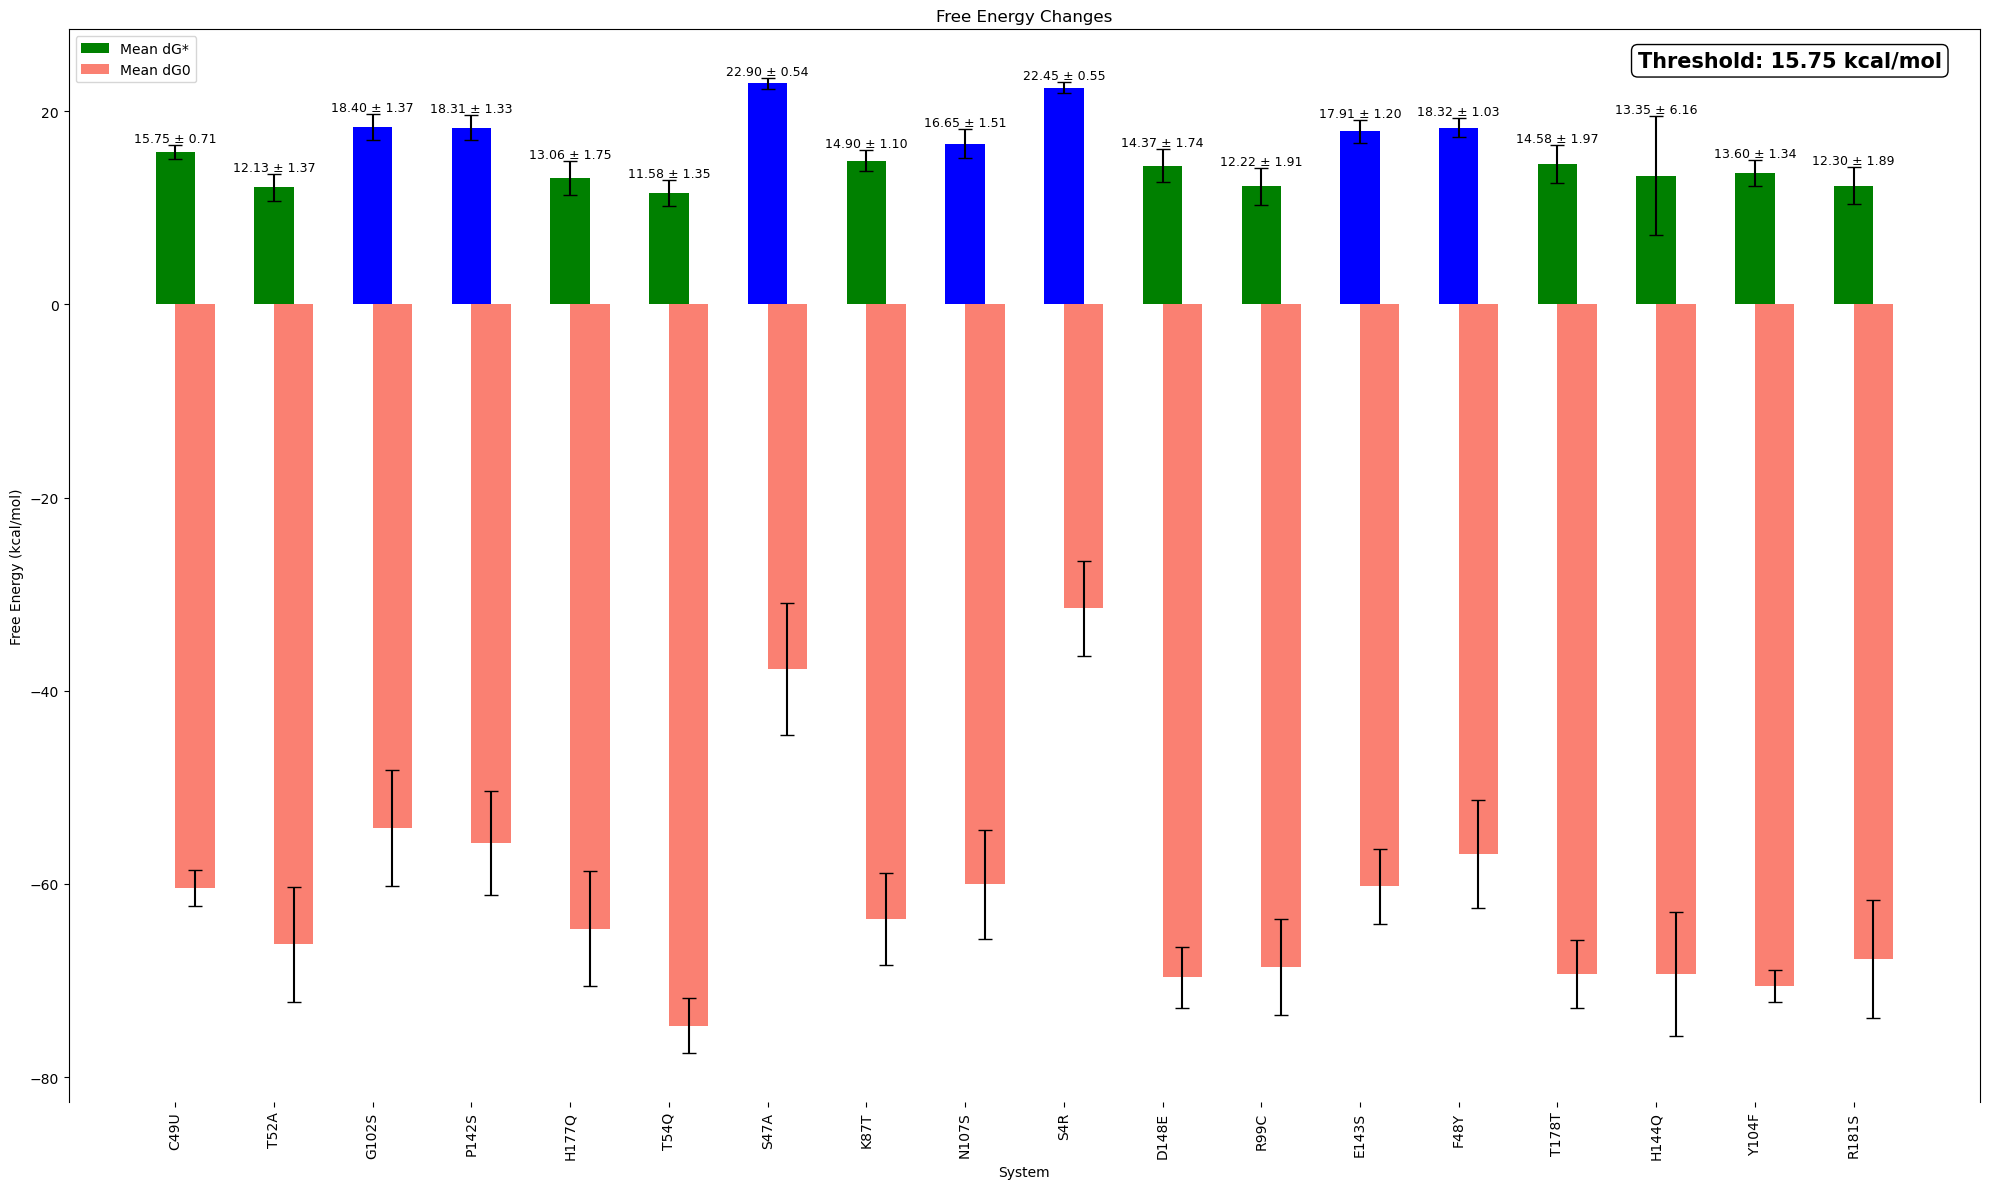

In [17]:
import re
import matplotlib.pyplot as plt

# Updated LaTeX table with new data
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}
\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    C49U & 15.75 $\pm$ 0.71 kcal/mol & -60.42 $\pm$ 1.86 kcal/mol \\
    \hline
    T52A & 12.13 $\pm$ 1.37 kcal/mol & -66.25 $\pm$ 5.96 kcal/mol \\
    \hline
    G102S & 18.40 $\pm$ 1.37 kcal/mol & -54.20 $\pm$ 6.00 kcal/mol \\
    \hline
    P142S & 18.31 $\pm$ 1.33 kcal/mol & -55.76 $\pm$ 5.42 kcal/mol \\
    \hline
    H177Q & 13.06 $\pm$ 1.75 kcal/mol & -64.62 $\pm$ 5.92 kcal/mol \\
    \hline
    T54Q & 11.58 $\pm$ 1.35 kcal/mol & -74.68 $\pm$ 2.84 kcal/mol \\
    \hline
    S47A & 22.90 $\pm$ 0.54 kcal/mol & -37.78 $\pm$ 6.85 kcal/mol \\
    \hline
    K87T & 14.90 $\pm$ 1.10 kcal/mol & -63.66 $\pm$ 4.76 kcal/mol \\
    \hline
    N107S & 16.65 $\pm$ 1.51 kcal/mol & -60.04 $\pm$ 5.65 kcal/mol \\
    \hline
    S4R & 22.45 $\pm$ 0.55 kcal/mol & -31.48 $\pm$ 4.93 kcal/mol \\
    \hline
    D148E & 14.37 $\pm$ 1.74 kcal/mol & -69.68 $\pm$ 3.16 kcal/mol \\
    \hline
    R99C & 12.22 $\pm$ 1.91 kcal/mol & -68.60 $\pm$ 4.98 kcal/mol \\
    \hline
    E143S & 17.91 $\pm$ 1.20 kcal/mol & -60.24 $\pm$ 3.90 kcal/mol \\
    \hline
    F48Y & 18.32 $\pm$ 1.03 kcal/mol & -56.91 $\pm$ 5.63 kcal/mol \\
    \hline
    T178T & 14.58 $\pm$ 1.97 kcal/mol & -69.34 $\pm$ 3.54 kcal/mol \\
    \hline
    H144Q & 13.35 $\pm$ 6.16 kcal/mol & -69.35 $\pm$ 6.43 kcal/mol \\
    \hline
    Y104F & 13.60 $\pm$ 1.34 kcal/mol & -70.58 $\pm$ 1.63 kcal/mol \\
    \hline
    R181S & 12.30 $\pm$ 1.89 kcal/mol & -67.78 $\pm$ 6.09 kcal/mol \\
    \hline
    \end{tabular}
    \caption{Free energy changes in wild type and mutants at 10 Å distance with errors}
\end{table}
\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<system>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)\s*kcal/mol",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
systems = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

for match in matches:
    system, dg_star, dg_star_error, dg0, dg0_error = match
    systems.append(system.strip())
    dg_star_values.append(float(dg_star))
    dg_star_errors.append(float(dg_star_error))
    dg0_values.append(float(dg0))
    dg0_errors.append(float(dg0_error))

# Set C49U as threshold (same as before)
threshold_dg_star = 15.75

# Color condition for dG* bars based on C49U threshold
colors = ['blue' if dg_star > threshold_dg_star else 'green' for dg_star in dg_star_values]

# Plot the data as a bar plot with a wider figure
plt.figure(figsize=(20, 12))

# Bar positions
x = range(len(systems))

# Plot Mean dG* values with error bars
bars = plt.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

# Plot Mean dG0 values with error bars
plt.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='salmon', width=0.4, align='edge')

# Add text annotations for dG* values and errors
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + dg_star_errors[i],
            f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=9, color='black')

# Remove horizontal grid lines
plt.grid(False)

# Remove x-axis line (spine)
plt.gca().spines['bottom'].set_visible(False)

# Add label for the threshold value in the upper-right corner
plt.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
        color='black', fontsize=15, ha='right', va='top', fontweight='bold', 
        transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Customizing plot
plt.xticks(x, systems, rotation=90, ha="center")
plt.xlabel("System")
plt.ylabel("Free Energy (kcal/mol)")
plt.title("Free Energy Changes")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

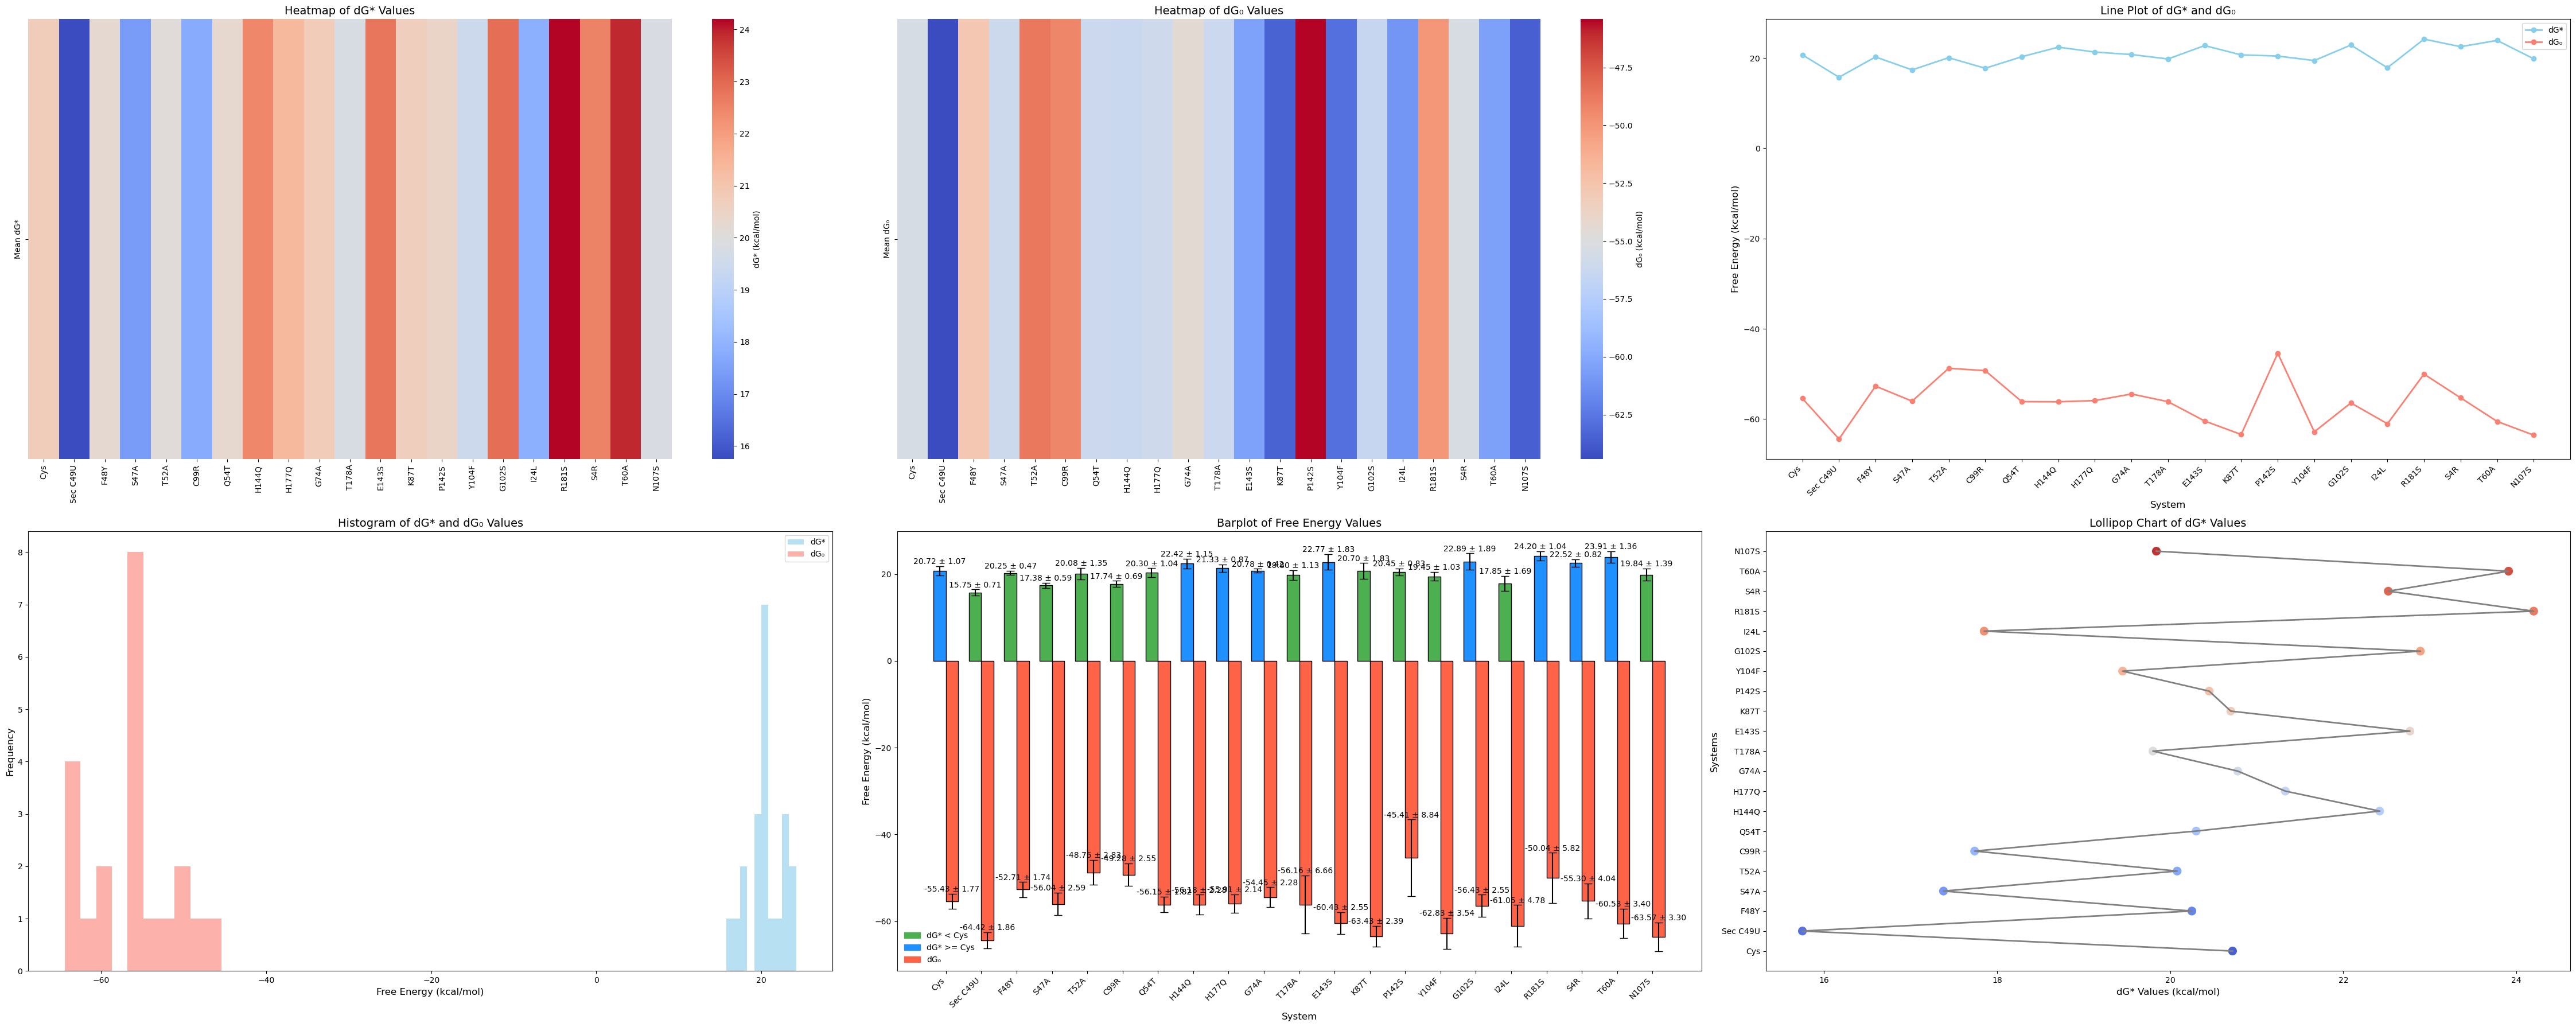

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Data extracted from the table provided
systems = ['Cys', 'Sec C49U', 'F48Y', 'S47A', 'T52A', 'C99R', 'Q54T', 'H144Q', 'H177Q', 'G74A', 
           'T178A', 'E143S', 'K87T', 'P142S', 'Y104F', 'G102S', 'I24L', 'R181S', 'S4R', 'T60A', 'N107S']
dg_star_values = [20.72, 15.75, 20.25, 17.38, 20.08, 17.74, 20.3, 22.42, 21.33, 20.78, 19.8, 22.77, 
                  20.7, 20.45, 19.45, 22.89, 17.85, 24.2, 22.52, 23.91, 19.84]
dg_star_errors = [1.07, 0.71, 0.47, 0.59, 1.35, 0.69, 1.04, 1.15, 0.87, 0.42, 1.13, 1.83, 
                  1.83, 0.83, 1.03, 1.89, 1.69, 1.04, 0.82, 1.36, 1.39]
dg_zero_values = [-55.43, -64.42, -52.71, -56.04, -48.75, -49.28, -56.15, -56.18, -55.91, -54.45, 
                  -56.16, -60.43, -63.43, -45.41, -62.83, -56.43, -61.05, -50.04, -55.3, -60.53, -63.57]
dg_zero_errors = [1.77, 1.86, 1.74, 2.59, 2.83, 2.55, 1.82, 2.28, 2.14, 2.28, 6.66, 2.55, 
                  2.39, 8.84, 3.54, 2.55, 4.78, 5.82, 4.04, 3.4, 3.3]

# Threshold for low dG* values (set to Cys dG* value)
low_dg_star_threshold = dg_star_values[0]

# Create figure with subplots for all plots
fig, axs = plt.subplots(2, 3, figsize=(45, 18), dpi=100)

# --- Plot 1: Heatmap for dG* (no values shown) ---
heatmap_data_dg_star = np.array([dg_star_values])
sns.heatmap(
    heatmap_data_dg_star, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG*'], 
    ax=axs[0, 0], cbar_kws={'label': 'dG* (kcal/mol)'}
)
axs[0, 0].set_title("Heatmap of dG* Values", fontsize=14)

# --- Plot 2: Heatmap for dG₀ (no values shown) ---
heatmap_data_dg_zero = np.array([dg_zero_values])
sns.heatmap(
    heatmap_data_dg_zero, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG₀'], 
    ax=axs[0, 1], cbar_kws={'label': 'dG₀ (kcal/mol)'}
)
axs[0, 1].set_title("Heatmap of dG₀ Values", fontsize=14)

# --- Plot 3: Histogram for dG* and dG₀ ---
axs[1, 0].hist(dg_star_values, bins=10, alpha=0.6, label='dG*', color='skyblue')
axs[1, 0].hist(dg_zero_values, bins=10, alpha=0.6, label='dG₀', color='salmon')
axs[1, 0].set_title("Histogram of dG* and dG₀ Values", fontsize=14)
axs[1, 0].set_xlabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)
axs[1, 0].legend()

# --- Plot 4: Barplot for dG* and dG₀ with error bars ---
x = np.arange(len(systems))  # the label locations
width = 0.35

bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)

bars1 = axs[1, 1].bar(x - width/2, dg_star_values, width, label='Mean dG*', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = axs[1, 1].bar(x + width/2, dg_zero_values, width, label='Mean dG₀', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Adding the free energy values to the labels
for i in range(len(systems)):
    axs[1, 1].text(x[i] - width/2, dg_star_values[i] + dg_star_errors[i] + 0.5, f"{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}", ha="center", fontsize=10)
    axs[1, 1].text(x[i] + width/2, dg_zero_values[i] + dg_zero_errors[i] + 0.5, f"{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}", ha="center", fontsize=10)

axs[1, 1].set_xlabel("System", fontsize=12)
axs[1, 1].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 1].set_title("Barplot of Free Energy Values", fontsize=14)
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG₀')
]
axs[1, 1].legend(handles=handles, fontsize=10, frameon=False)

# --- Plot 5: Lollipop Chart for dG* values ---
axs[1, 2].scatter(dg_star_values, systems, color=sns.color_palette("coolwarm", len(systems)), s=100, label="dG*")
axs[1, 2].plot(dg_star_values, systems, color="gray", linewidth=2)  # Line connecting points
axs[1, 2].set_title("Lollipop Chart of dG* Values", fontsize=14)
axs[1, 2].set_xlabel("dG* Values (kcal/mol)", fontsize=12)
axs[1, 2].set_ylabel("Systems", fontsize=12)

# --- Plot 6: Line plot for dG* and dG₀ ---
axs[0, 2].plot(systems, dg_star_values, label="dG*", color="skyblue", marker='o', linestyle='-', linewidth=2)
axs[0, 2].plot(systems, dg_zero_values, label="dG₀", color="salmon", marker='o', linestyle='-', linewidth=2)
axs[0, 2].set_xlabel("System", fontsize=12)
axs[0, 2].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[0, 2].set_title("Line Plot of dG* and dG₀", fontsize=14)
axs[0, 2].legend(fontsize=10)
axs[0, 2].set_xticks(range(len(systems)))
axs[0, 2].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

# Create the directory if it doesn't exist
output_directory = '/home/hp/nayanika/github/GPX6/figures'
os.makedirs(output_directory, exist_ok=True)

# Save the figure to the directory
save_path = os.path.join(output_directory, 'Subplot1mouse.png')
fig.savefig(save_path)

save_path

# Adjust layout and show plots
plt.tight_layout()
plt.show()


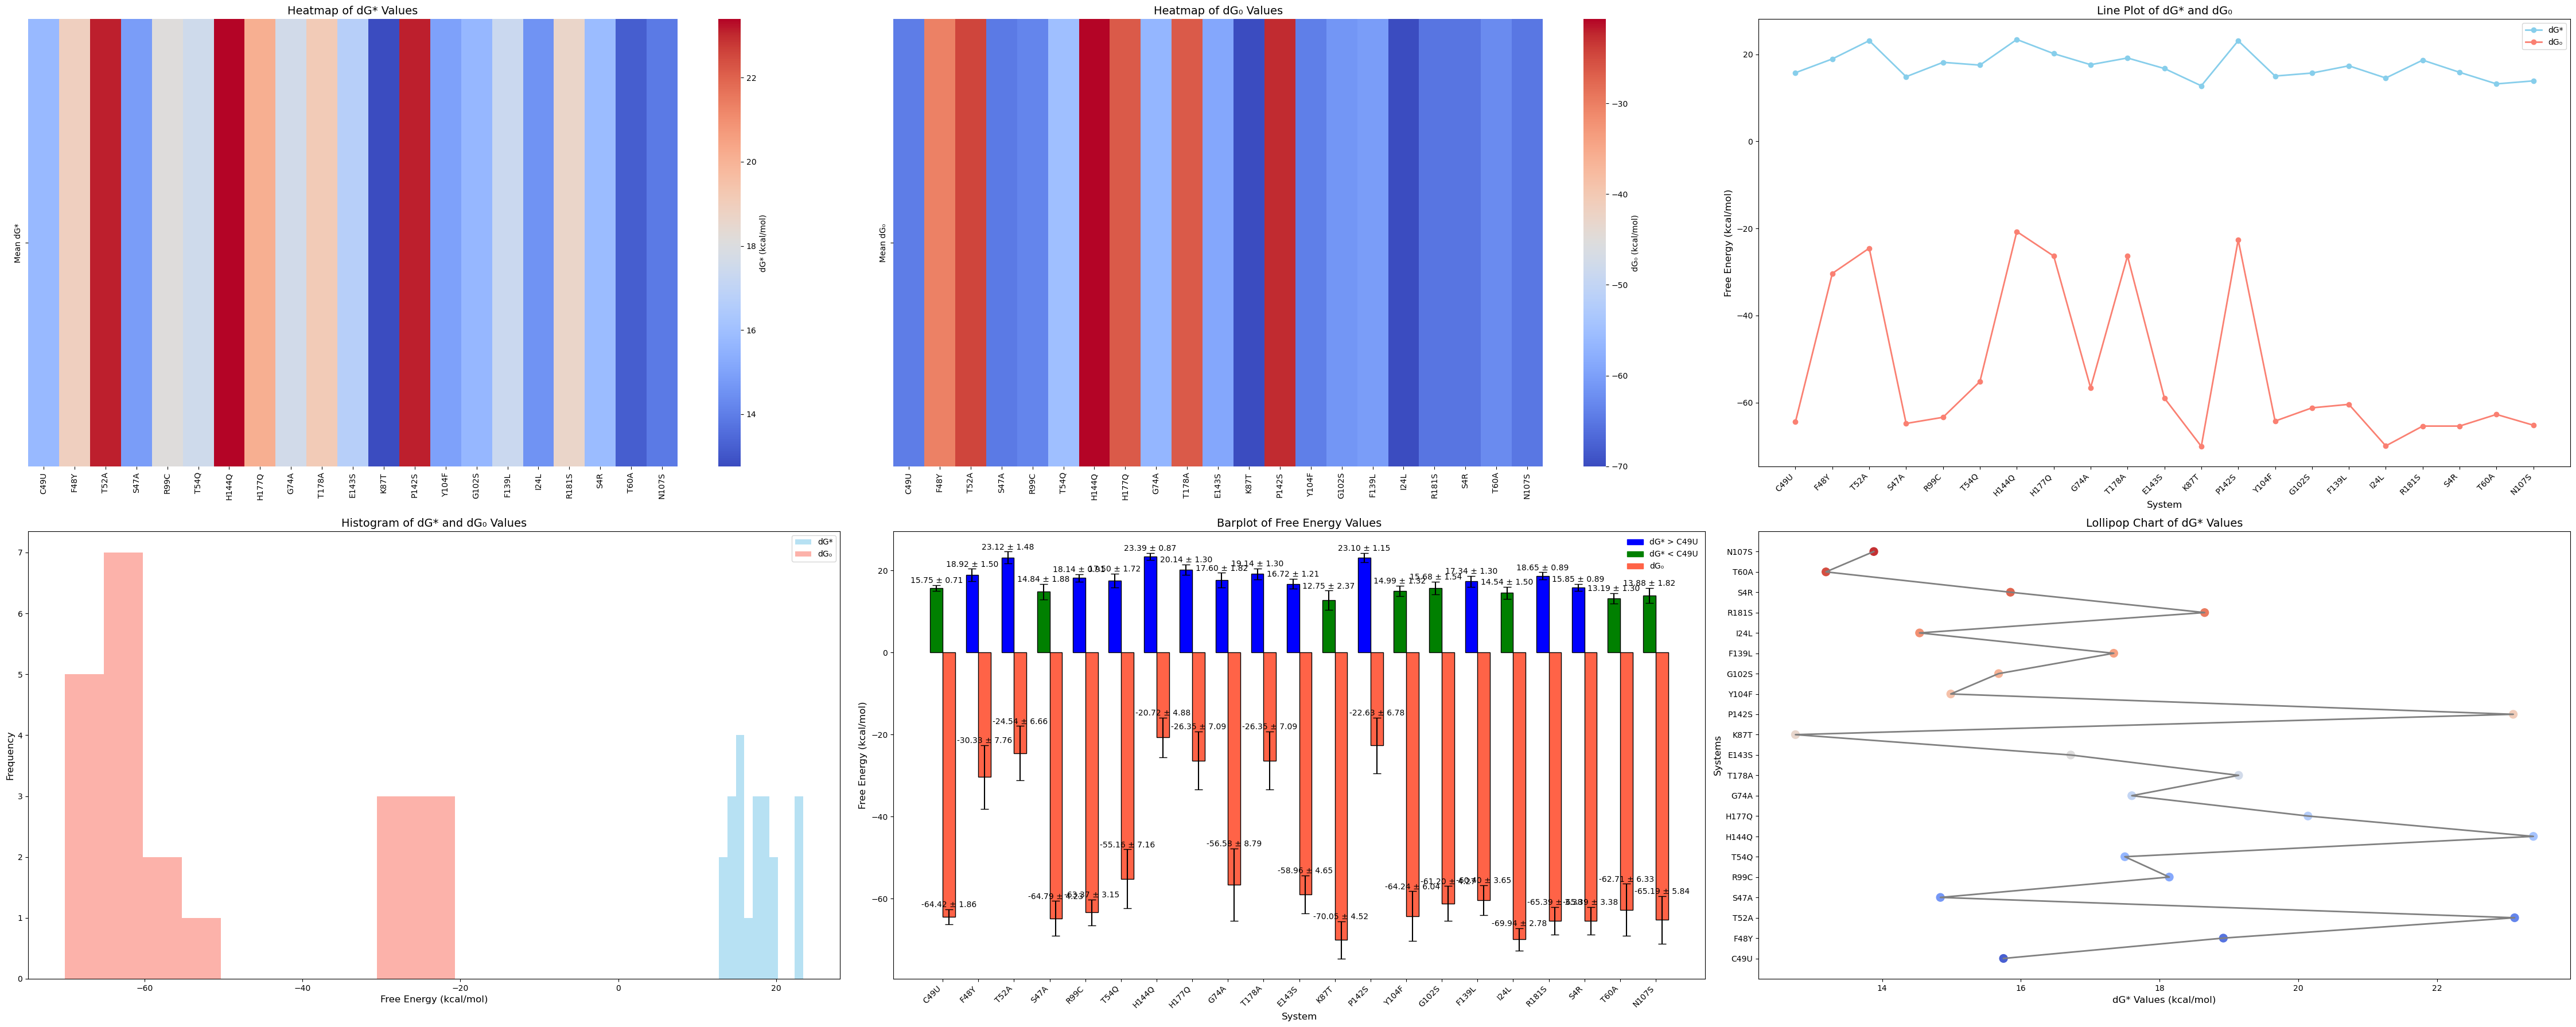

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Data extracted from the LaTeX table provided
systems = ['C49U', 'F48Y', 'T52A', 'S47A', 'R99C', 'T54Q', 'H144Q', 'H177Q', 'G74A', 'T178A', 
           'E143S', 'K87T', 'P142S', 'Y104F', 'G102S', 'F139L', 'I24L', 'R181S', 'S4R', 'T60A', 'N107S']

dg_star_values = [15.75, 18.92, 23.12, 14.84, 18.14, 17.50, 23.39, 20.14, 17.60, 19.14, 
                  16.72, 12.75, 23.10, 14.99, 15.68, 17.34, 14.54, 18.65, 15.85, 13.19, 13.88]

dg_star_errors = [0.71, 1.50, 1.48, 1.88, 0.91, 1.72, 0.87, 1.30, 1.82, 1.30, 1.21, 2.37, 
                  1.15, 1.32, 1.54, 1.30, 1.50, 0.89, 0.89, 1.30, 1.82]

dg_zero_values = [-64.42, -30.33, -24.54, -64.79, -63.37, -55.16, -20.72, -26.35, -56.58, -26.35, 
                  -58.96, -70.05, -22.63, -64.24, -61.20, -60.40, -69.94, -65.39, -65.39, -62.71, -65.19]

dg_zero_errors = [1.86, 7.76, 6.66, 4.23, 3.15, 7.16, 4.88, 7.09, 8.79, 7.09, 4.65, 4.52, 
                  6.78, 6.04, 4.27, 3.65, 2.78, 3.38, 3.38, 6.33, 5.84]

# Set the threshold value based on C49U mutation
threshold_dg_star = dg_star_values[0]

# Create figure with subplots for all plots
fig, axs = plt.subplots(2, 3, figsize=(45, 18), dpi=100)

# --- Plot 1: Heatmap for dG* (no values shown) ---
heatmap_data_dg_star = np.array([dg_star_values])
sns.heatmap(
    heatmap_data_dg_star, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG*'], 
    ax=axs[0, 0], cbar_kws={'label': 'dG* (kcal/mol)'}
)
axs[0, 0].set_title("Heatmap of dG* Values", fontsize=14)

# --- Plot 2: Heatmap for dG₀ (no values shown) ---
heatmap_data_dg_zero = np.array([dg_zero_values])
sns.heatmap(
    heatmap_data_dg_zero, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG₀'], 
    ax=axs[0, 1], cbar_kws={'label': 'dG₀ (kcal/mol)'}
)
axs[0, 1].set_title("Heatmap of dG₀ Values", fontsize=14)

# --- Plot 3: Histogram for dG* and dG₀ ---
axs[1, 0].hist(dg_star_values, bins=10, alpha=0.6, label='dG*', color='skyblue')
axs[1, 0].hist(dg_zero_values, bins=10, alpha=0.6, label='dG₀', color='salmon')
axs[1, 0].set_title("Histogram of dG* and dG₀ Values", fontsize=14)
axs[1, 0].set_xlabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)
axs[1, 0].legend()

# --- Plot 4: Barplot for dG* and dG₀ with error bars ---
x = np.arange(len(systems))  # the label locations
width = 0.35

# Color bars based on the threshold (blue for greater, green for lesser)
bar_colors_dg_star = ['#0000FF' if val > threshold_dg_star else '#008000' for val in dg_star_values]
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)

bars1 = axs[1, 1].bar(x - width/2, dg_star_values, width, label='Mean dG*', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = axs[1, 1].bar(x + width/2, dg_zero_values, width, label='Mean dG₀', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Adding the free energy values to the labels
for i in range(len(systems)):
    axs[1, 1].text(x[i] - width/2, dg_star_values[i] + dg_star_errors[i] + 0.5, f"{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}", ha="center", fontsize=10)
    axs[1, 1].text(x[i] + width/2, dg_zero_values[i] + dg_zero_errors[i] + 0.5, f"{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}", ha="center", fontsize=10)

axs[1, 1].set_xlabel("System", fontsize=12)
axs[1, 1].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 1].set_title("Barplot of Free Energy Values", fontsize=14)
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

handles = [
    plt.Rectangle((0, 0), 1, 1, color='#0000FF', label='dG* > C49U'),
    plt.Rectangle((0, 0), 1, 1, color='#008000', label='dG* < C49U'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG₀')
]
axs[1, 1].legend(handles=handles, fontsize=10, frameon=False)

# --- Plot 5: Lollipop Chart for dG* values ---
axs[1, 2].scatter(dg_star_values, systems, color=sns.color_palette("coolwarm", len(systems)), s=100, label="dG*")
axs[1, 2].plot(dg_star_values, systems, color="gray", linewidth=2)  # Line connecting points
axs[1, 2].set_title("Lollipop Chart of dG* Values", fontsize=14)
axs[1, 2].set_xlabel("dG* Values (kcal/mol)", fontsize=12)
axs[1, 2].set_ylabel("Systems", fontsize=12)

# --- Plot 6: Line plot for dG* and dG₀ ---
axs[0, 2].plot(systems, dg_star_values, label="dG*", color="skyblue", marker='o', linestyle='-', linewidth=2)
axs[0, 2].plot(systems, dg_zero_values, label="dG₀", color="salmon", marker='o', linestyle='-', linewidth=2)
axs[0, 2].set_xlabel("System", fontsize=12)
axs[0, 2].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[0, 2].set_title("Line Plot of dG* and dG₀", fontsize=14)
axs[0, 2].legend(fontsize=10)
axs[0, 2].set_xticks(range(len(systems)))
axs[0, 2].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

# Create the directory if it doesn't exist
output_directory = '/home/hp/nayanika/github/GPX6/figures'
os.makedirs(output_directory, exist_ok=True)

# Save the figure to the directory
save_path = os.path.join(output_directory, 'Subplot2mouse.png')
fig.savefig(save_path)

save_path

# Adjust layout and show plots
plt.tight_layout()
plt.show()


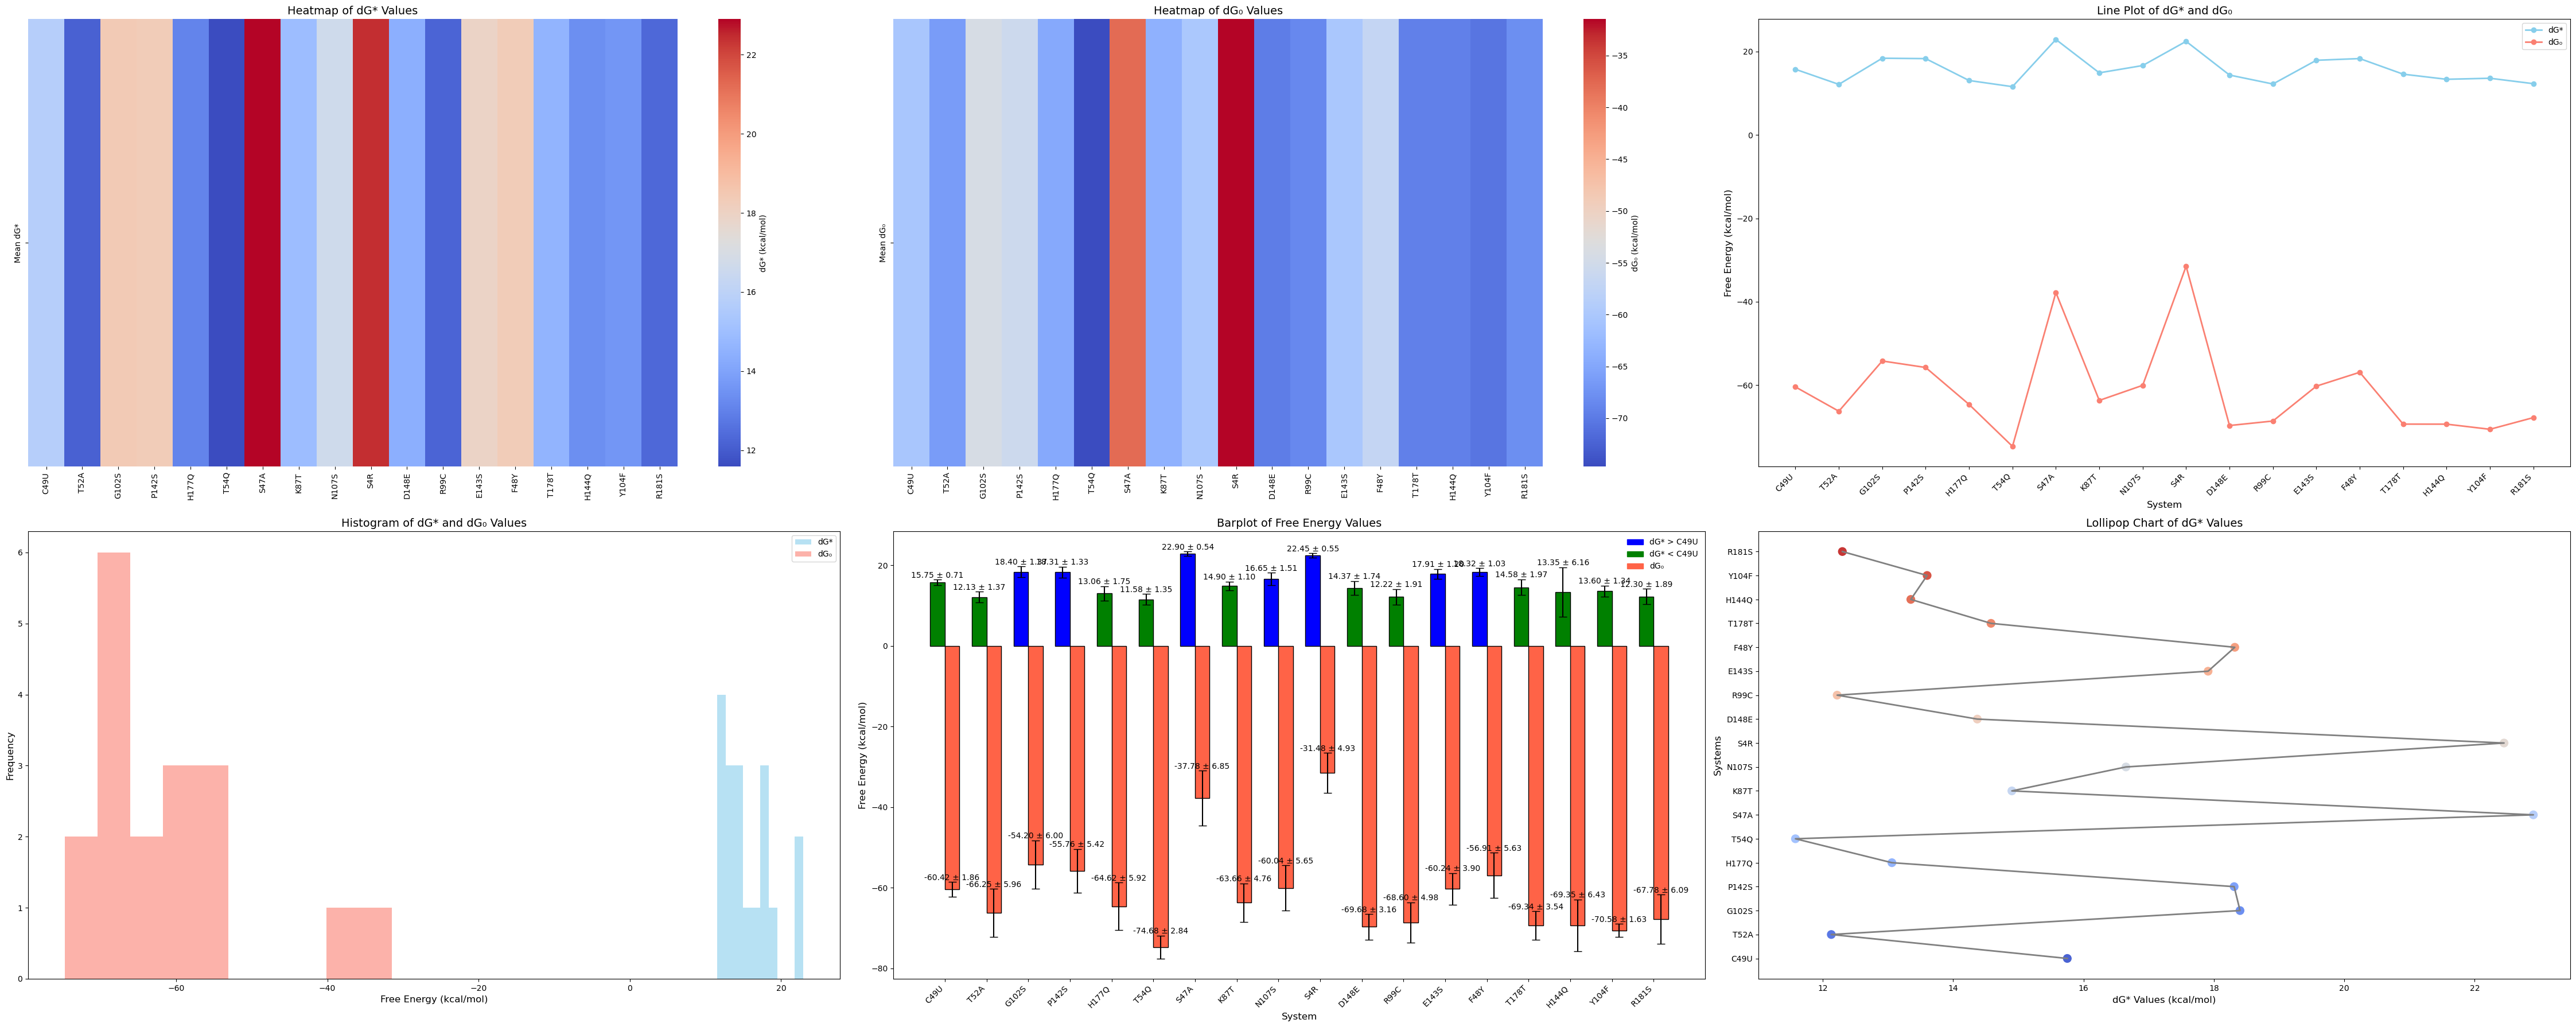

In [32]:
# Data from the new LaTeX table provided
systems = ['C49U', 'T52A', 'G102S', 'P142S', 'H177Q', 'T54Q', 'S47A', 'K87T', 'N107S', 'S4R', 
           'D148E', 'R99C', 'E143S', 'F48Y', 'T178T', 'H144Q', 'Y104F', 'R181S']

dg_star_values = [15.75, 12.13, 18.40, 18.31, 13.06, 11.58, 22.90, 14.90, 16.65, 22.45, 
                  14.37, 12.22, 17.91, 18.32, 14.58, 13.35, 13.60, 12.30]

dg_star_errors = [0.71, 1.37, 1.37, 1.33, 1.75, 1.35, 0.54, 1.10, 1.51, 0.55, 1.74, 1.91, 
                  1.20, 1.03, 1.97, 6.16, 1.34, 1.89]

dg_zero_values = [-60.42, -66.25, -54.20, -55.76, -64.62, -74.68, -37.78, -63.66, -60.04, -31.48, 
                  -69.68, -68.60, -60.24, -56.91, -69.34, -69.35, -70.58, -67.78]

dg_zero_errors = [1.86, 5.96, 6.00, 5.42, 5.92, 2.84, 6.85, 4.76, 5.65, 4.93, 3.16, 4.98, 
                  3.90, 5.63, 3.54, 6.43, 1.63, 6.09]

# Set the threshold value based on C49U mutation
threshold_dg_star = dg_star_values[0]

# Create figure with subplots for all plots
fig, axs = plt.subplots(2, 3, figsize=(45, 18), dpi=100)

# --- Plot 1: Heatmap for dG* (no values shown) ---
heatmap_data_dg_star = np.array([dg_star_values])
sns.heatmap(
    heatmap_data_dg_star, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG*'], 
    ax=axs[0, 0], cbar_kws={'label': 'dG* (kcal/mol)'}
)
axs[0, 0].set_title("Heatmap of dG* Values", fontsize=14)

# --- Plot 2: Heatmap for dG₀ (no values shown) ---
heatmap_data_dg_zero = np.array([dg_zero_values])
sns.heatmap(
    heatmap_data_dg_zero, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Removed annotations
    xticklabels=systems, 
    yticklabels=['Mean dG₀'], 
    ax=axs[0, 1], cbar_kws={'label': 'dG₀ (kcal/mol)'}
)
axs[0, 1].set_title("Heatmap of dG₀ Values", fontsize=14)

# --- Plot 3: Histogram for dG* and dG₀ ---
axs[1, 0].hist(dg_star_values, bins=10, alpha=0.6, label='dG*', color='skyblue')
axs[1, 0].hist(dg_zero_values, bins=10, alpha=0.6, label='dG₀', color='salmon')
axs[1, 0].set_title("Histogram of dG* and dG₀ Values", fontsize=14)
axs[1, 0].set_xlabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)
axs[1, 0].legend()

# --- Plot 4: Barplot for dG* and dG₀ with error bars ---
x = np.arange(len(systems))  # the label locations
width = 0.35

# Color bars based on the threshold (blue for greater, green for lesser)
bar_colors_dg_star = ['#0000FF' if val > threshold_dg_star else '#008000' for val in dg_star_values]
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)

bars1 = axs[1, 1].bar(x - width/2, dg_star_values, width, label='Mean dG*', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = axs[1, 1].bar(x + width/2, dg_zero_values, width, label='Mean dG₀', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Adding the free energy values to the labels
for i in range(len(systems)):
    axs[1, 1].text(x[i] - width/2, dg_star_values[i] + dg_star_errors[i] + 0.5, f"{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}", ha="center", fontsize=10)
    axs[1, 1].text(x[i] + width/2, dg_zero_values[i] + dg_zero_errors[i] + 0.5, f"{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}", ha="center", fontsize=10)

axs[1, 1].set_xlabel("System", fontsize=12)
axs[1, 1].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 1].set_title("Barplot of Free Energy Values", fontsize=14)
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

handles = [
    plt.Rectangle((0, 0), 1, 1, color='#0000FF', label='dG* > C49U'),
    plt.Rectangle((0, 0), 1, 1, color='#008000', label='dG* < C49U'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG₀')
]
axs[1, 1].legend(handles=handles, fontsize=10, frameon=False)

# --- Plot 5: Lollipop Chart for dG* values ---
axs[1, 2].scatter(dg_star_values, systems, color=sns.color_palette("coolwarm", len(systems)), s=100, label="dG*")
axs[1, 2].plot(dg_star_values, systems, color="gray", linewidth=2)  # Line connecting points
axs[1, 2].set_title("Lollipop Chart of dG* Values", fontsize=14)
axs[1, 2].set_xlabel("dG* Values (kcal/mol)", fontsize=12)
axs[1, 2].set_ylabel("Systems", fontsize=12)

# --- Plot 6: Line plot for dG* and dG₀ ---
axs[0, 2].plot(systems, dg_star_values, label="dG*", color="skyblue", marker='o', linestyle='-', linewidth=2)
axs[0, 2].plot(systems, dg_zero_values, label="dG₀", color="salmon", marker='o', linestyle='-', linewidth=2)
axs[0, 2].set_xlabel("System", fontsize=12)
axs[0, 2].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[0, 2].set_title("Line Plot of dG* and dG₀", fontsize=14)
axs[0, 2].legend(fontsize=10)
axs[0, 2].set_xticks(range(len(systems)))
axs[0, 2].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

# Create the directory if it doesn't exist
output_directory = '/home/hp/nayanika/github/GPX6/figures'
os.makedirs(output_directory, exist_ok=True)

# Save the figure to the directory
save_path = os.path.join(output_directory, 'Subplot3mouse.png')
fig.savefig(save_path)

save_path

# Adjust layout and show plots
plt.tight_layout()
plt.show()


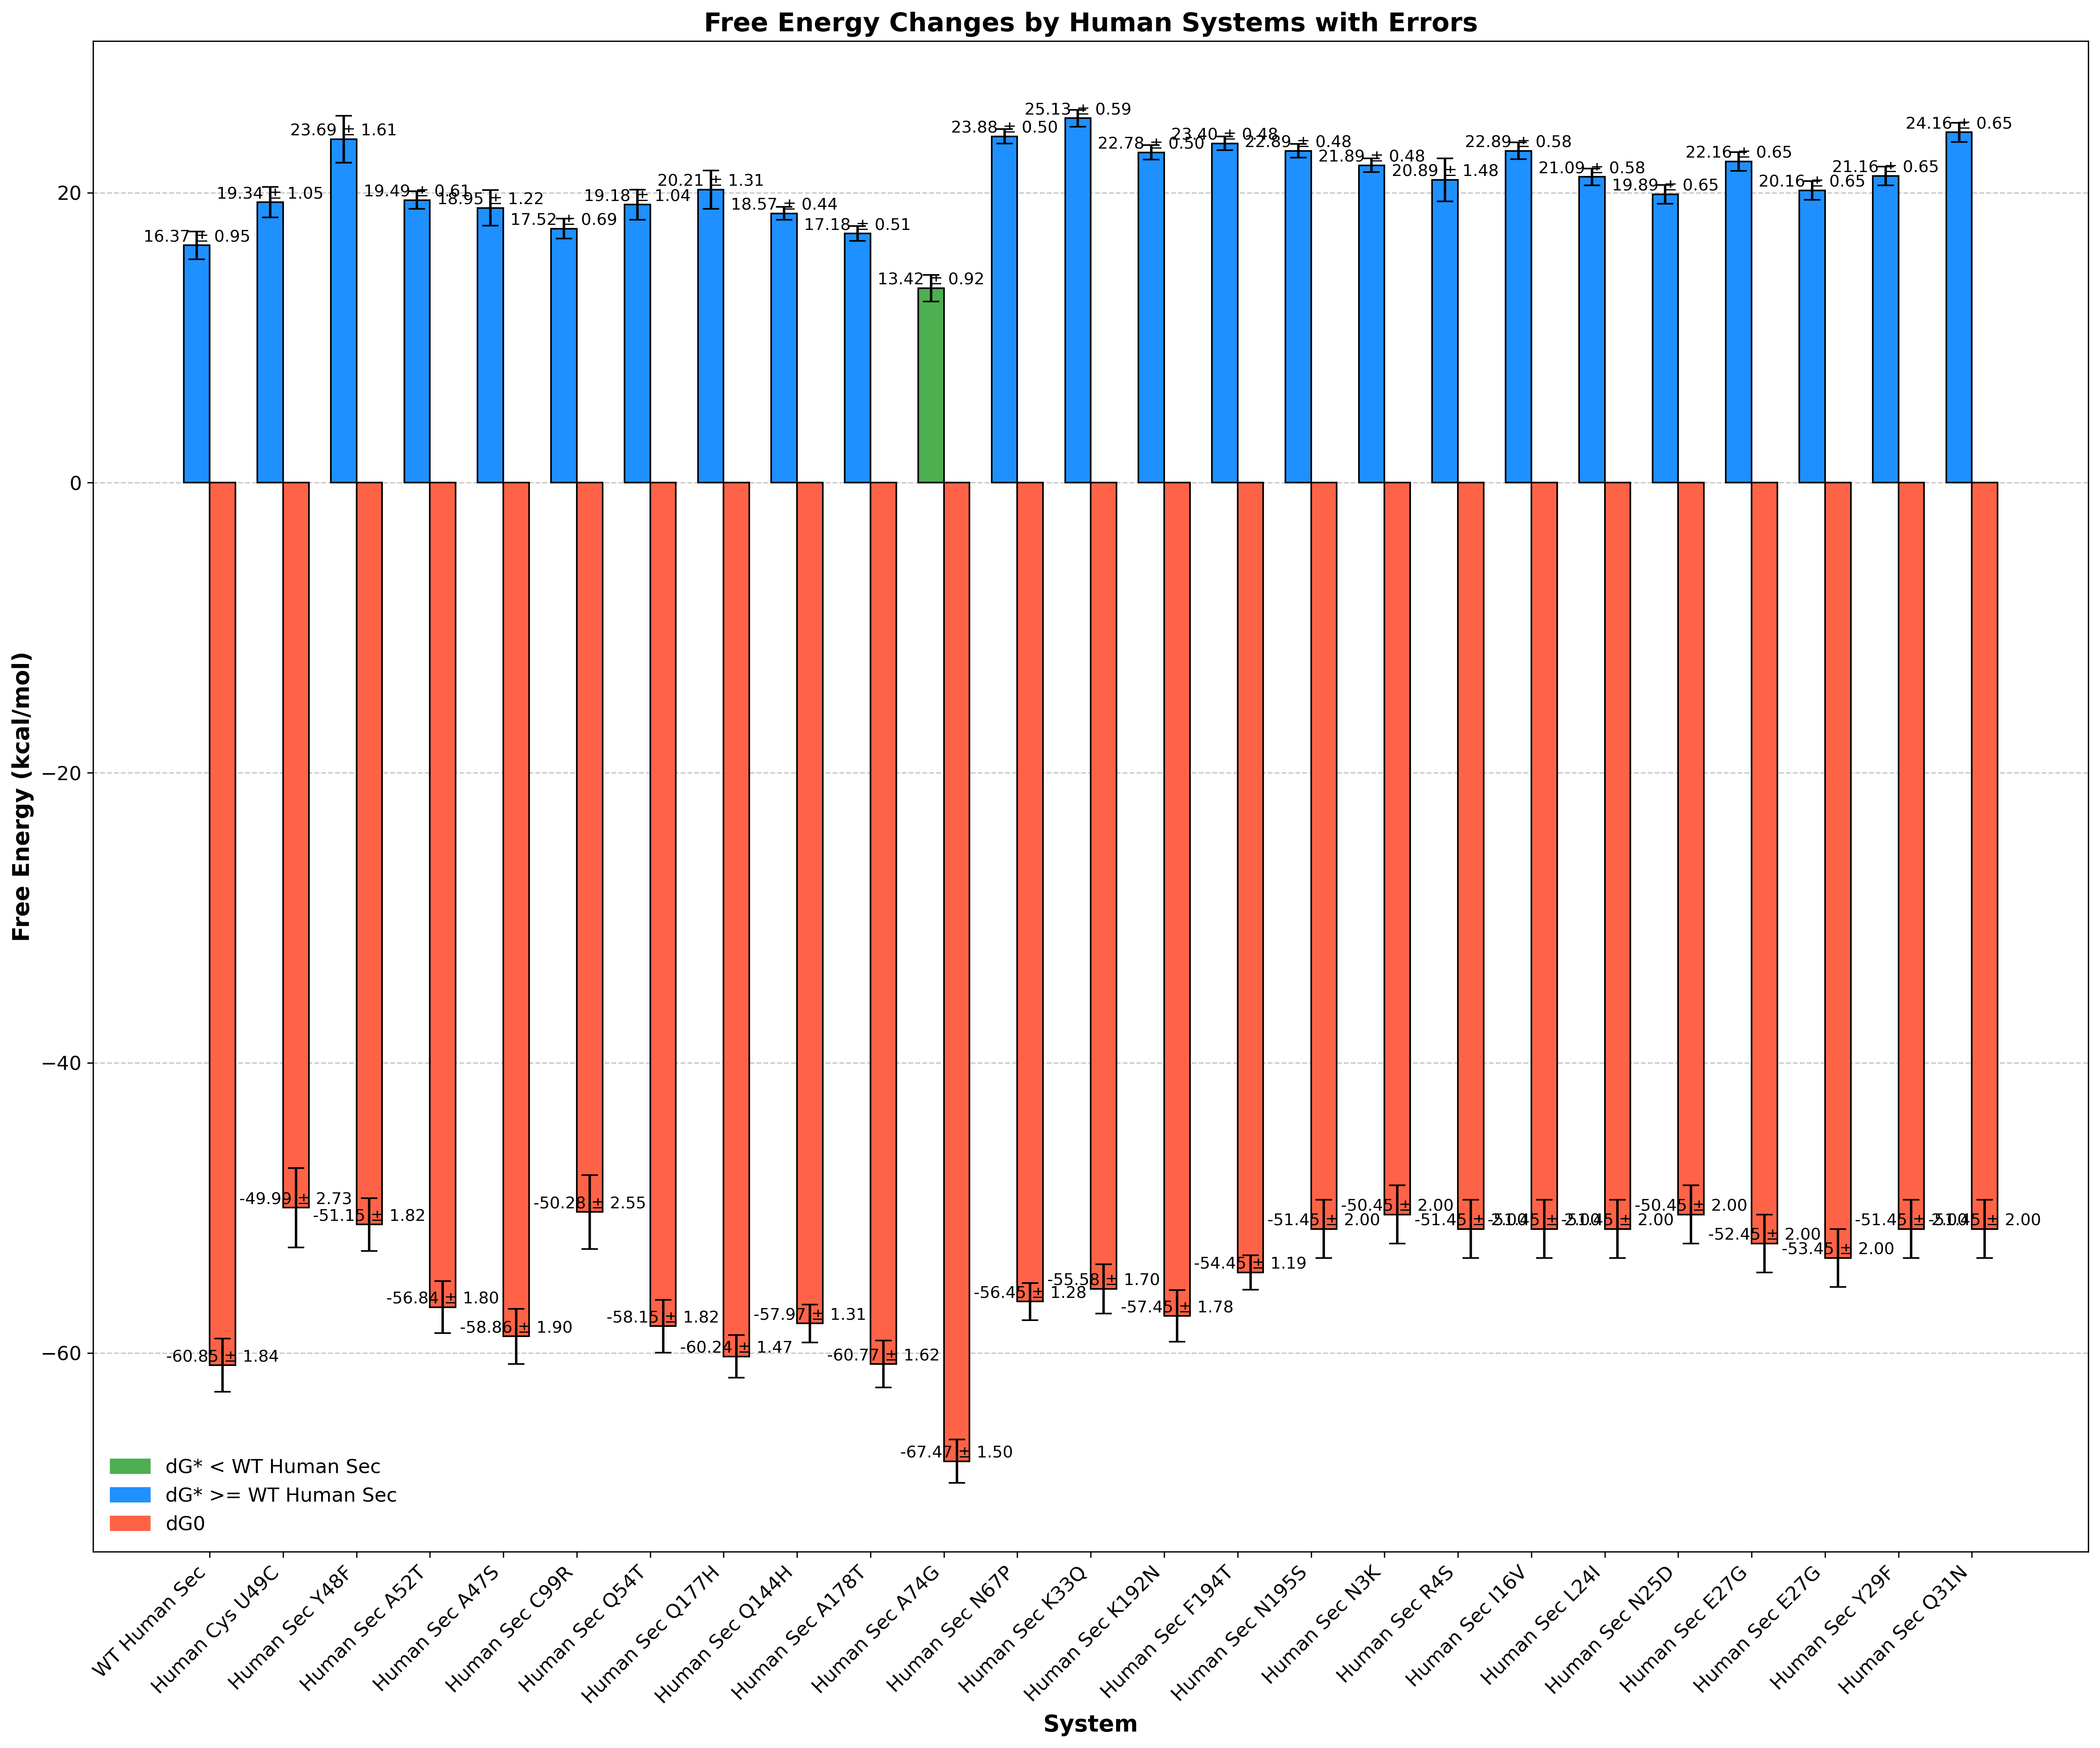

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Free_Energy_BarPlot_with_Errors_Human.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Human" in system_name:  # Filter for Human entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Human Sec' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Human Sec" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Human Sec dG* value not found in the table.")

# Threshold for low dG* values (set to WT-Human Sec dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15), dpi=300)  

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Human Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()
